In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
file = pd.read_csv("/content/IMDB Dataset.csv")

In [4]:
data = file[:14500]

In [5]:
print("Data shape :", data.shape)
data.head(5)

Data shape : (14500, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14500 entries, 0 to 14499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     14500 non-null  object
 1   sentiment  14500 non-null  object
dtypes: object(2)
memory usage: 226.7+ KB


In [7]:
duplicates = data[data.duplicated(['review'])]
duplicates


,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


In [8]:
data.drop_duplicates(keep=False, inplace=True)

<ipython-input-8-ec62a0ea1113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep=False, inplace=True)


In [9]:
data.shape

(14424, 2)

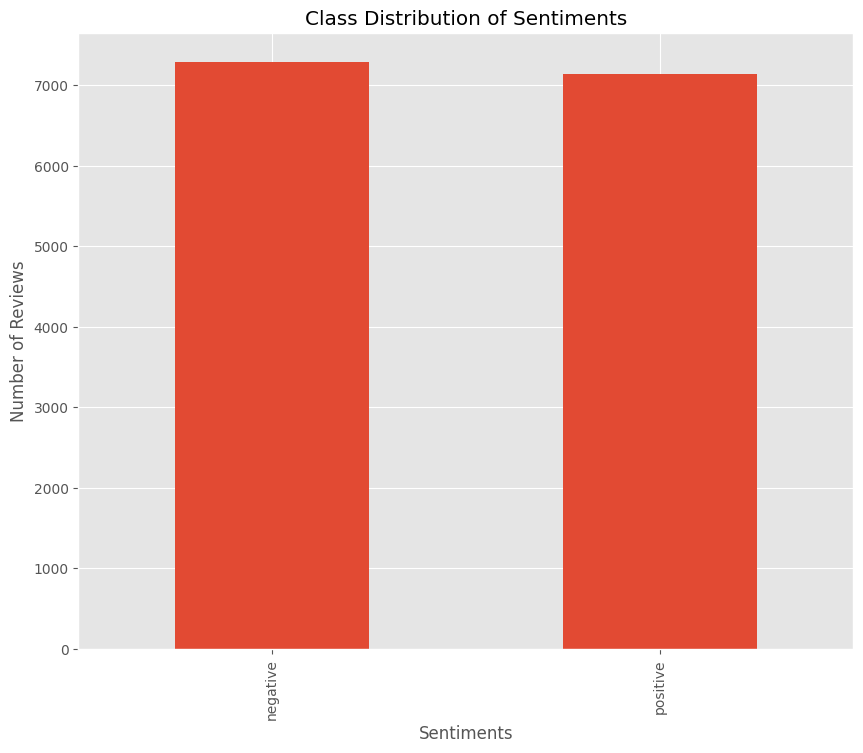

In [10]:
plt.figure(figsize = (10,8))
data["sentiment"].value_counts().plot(kind='bar')
plt.title('Class Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [11]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = nltk.word_tokenize(text)
    words = [w for w in words if w not in stopwords.words('english')] 
    text = ' '.join(words)  
    return text

In [12]:
data['cleaned_text'] = data['review'].apply(clean_text)

<ipython-input-12-5df4cd38198c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['review'].apply(clean_text)


In [13]:
cv = CountVectorizer()
X = cv.fit_transform(data['cleaned_text']).toarray()

In [14]:
Label_encoder = LabelEncoder()
y = data['sentiment']
y = Label_encoder.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy_score_ = accuracy_score(y_test, y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)

print("Accuracy of the model :", accuracy_score_)

Accuracy of the model : 0.8648180242634316


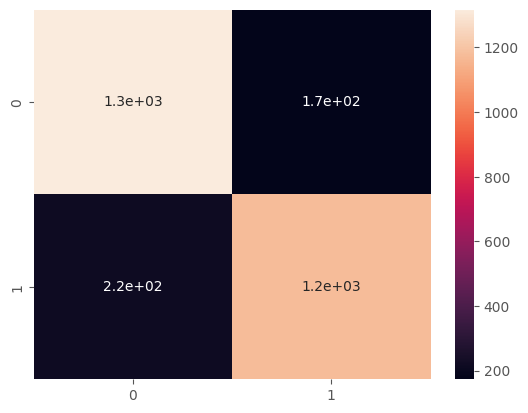

In [19]:
sns.heatmap(data = confusion_matrix_, annot = True)
plt.show()

In [20]:
def predict(text):
    x = cv.transform([text]).toarray()
    sentiment = model.predict(x)
    sentiment = Label_encoder.inverse_transform(sentiment)
    print(f"The review is {sentiment[0]}.")

In [21]:
text = "A dumb movie that could have been made only by an intelligent and talented man."
predict(text)

The review is negative.


In [22]:
Text = "Great acting and amazing plot. Wonderful work"
predict(Text)

The review is positive.
